In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [15]:
# add indep. random walks to q* on each step
# set initial q* as 0

step_num = 5000

class Bandit:
    def __init__(self,number_of_arms, eps, alpha)->None:
        self.number_of_arms = number_of_arms
        self.q_list = [0]*self.number_of_arms
        self.eps = eps
        self.alpha = alpha

    # randomwalk - normally distributed increment N(0,0.01)
    def random_walk(self)->None:
        for i in range(self.number_of_arms):
            increment = np.random.normal(0,0.01)
            self.q_list[i] = self.q_list[i] + increment

    # epsilon greedy
    def eps_greedy(self)->int:
        coin = random.uniform(0,1)
        if self.eps > coin:
            return np.random.choice(self.number_of_arms)

        else:
            return np.argmax(self.q_list)

R_const_stepsize = []
R_varying_stepsize = []

B1 = Bandit(10,0.1,0.1)
reward_list = 0
reward_number = 0
avg_reward = 0

R_const_stepsize_list = []
R_varying_stepsize_list = []


#Constant stepsize paramter Q_n+1 =Qn+ alpha [Rn - Qn]
for i in range(step_num):
    for j in range(100):
        B1.random_walk()
        action = B1.eps_greedy()
        reward = B1.q_list[action]
        reward_number += 1
        B1.q_list[action] += B1.alpha*(reward-B1.q_list[action])
        avg_reward += 1/reward_number*(reward - avg_reward)
        R_const_stepsize.append(avg_reward)
    R_const_stepsize_list.append(np.mean(R_const_stepsize))


B1 = Bandit(10,0.1,0.1)
reward_list = 0
reward_number = 0
avg_reward = 0

for i in range(step_num):
    for j in range(100):
        B1.random_walk()
        action = B1.eps_greedy()
        reward = B1.q_list[action]
        reward_number += 1
        B1.q_list[action] += 1/reward_number*(reward-B1.q_list[action])
        avg_reward += 1/reward_number*(reward -avg_reward)
        R_varying_stepsize.append(avg_reward)
    R_varying_stepsize_list.append(np.mean(R_varying_stepsize))

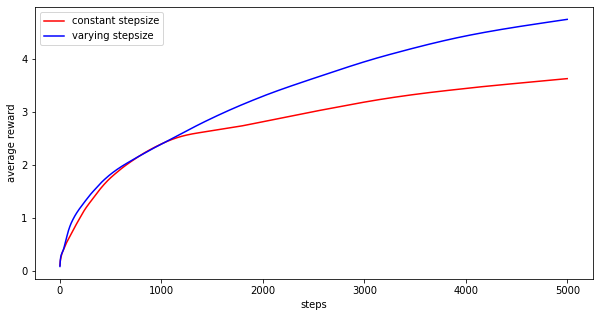

In [16]:

fig = plt.figure(figsize=(10,5))
fig.add_subplot(111)
plt.xlabel('steps')
plt.ylabel('average reward')
plt.plot(R_const_stepsize_list, 'r', label='constant stepsize')
plt.plot(R_varying_stepsize_list, 'b', label='varying stepsize')
plt.legend()
plt.show()


-0.008788875996470921